## 자동차 등록대수 및 증감률

### 데이터 불러와서 전처리

### 자동차 등록대수

In [4]:
import pandas as pd
import numpy as np

file_path = './data/raw/자동차등록대수현황_연도별.csv'
car_year = pd.read_csv(file_path, encoding='euc-kr')
car_year = car_year.transpose()
car_year.head(10)

,0,1,2,3,4
구분(1),구분(1),총합계,총합계,총합계,총합계
레벨01(1),레벨01(1),승용,승합,화물,특수
2015,계,16561665,920320,3432937,74963
2015.1,관용,27004,19079,29052,2422
2015.2,자가용,15807517,776127,3020822,18103
2015.3,영업용,727144,125114,383063,54438
2016,계,17338160,892539,3492173,80479
2016.1,관용,27750,20260,29834,2532
2016.2,자가용,16505364,746360,3072915,20670
2016.3,영업용,805046,125919,389424,57277


In [5]:
car_total = car_year.loc[['2015','2016','2017','2018','2019','2020','2021']]
car_total.columns = ['계','승용','승합','화물','특수']
car_total = car_total.drop(["계"], axis=1)
car_total = car_total.astype(int)
car_total

,승용,승합,화물,특수
2015,16561665,920320,3432937,74963
2016,17338160,892539,3492173,80479
2017,18034540,867522,3540323,85910
2018,18676924,843794,3590939,90898
2019,19177517,811799,3592586,95464
2020,19860955,783842,3615245,105937
2021,20410648,749968,3631975,118510


In [6]:
car_total = car_total.reset_index()
car_total.columns = ['년도','승용','승합','화물','특수']
car_total

,년도,승용,승합,화물,특수
0,2015,16561665,920320,3432937,74963
1,2016,17338160,892539,3492173,80479
2,2017,18034540,867522,3540323,85910
3,2018,18676924,843794,3590939,90898
4,2019,19177517,811799,3592586,95464
5,2020,19860955,783842,3615245,105937
6,2021,20410648,749968,3631975,118510


### 증감률

In [8]:
car_total['총계'] = car_total['승용'] + car_total['승합'] + car_total['화물'] + car_total['특수']
car_total

,년도,승용,승합,화물,특수,총계
0,2015,16561665,920320,3432937,74963,20989885
1,2016,17338160,892539,3492173,80479,21803351
2,2017,18034540,867522,3540323,85910,22528295
3,2018,18676924,843794,3590939,90898,23202555
4,2019,19177517,811799,3592586,95464,23677366
5,2020,19860955,783842,3615245,105937,24365979
6,2021,20410648,749968,3631975,118510,24911101


In [9]:
ratio = ['null']
for i in range(0, 7, 1):
    try:
        ratio.append(car_total.iloc[i+1]['총계'] / car_total.iloc[i]['총계'] * 100)
    except:
        pass
ratio = pd.DataFrame(ratio)
ratio.columns = ['증감비']
ratio.loc[0] = np.nan
ratio['년도'] = ['2015','2016','2017','2018','2019','2020','2021']
ratio

,증감비,년도
0,NaN,2015
1,103.875514,2016
2,103.32492,2017
3,102.992947,2018
4,102.046374,2019
5,102.908318,2020
6,102.237226,2021


In [10]:
df = pd.merge(car_total, ratio, how='outer', on='년도')
df

,년도,승용,승합,화물,특수,총계,증감비
0,2015,16561665,920320,3432937,74963,20989885,NaN
1,2016,17338160,892539,3492173,80479,21803351,103.875514
2,2017,18034540,867522,3540323,85910,22528295,103.32492
3,2018,18676924,843794,3590939,90898,23202555,102.992947
4,2019,19177517,811799,3592586,95464,23677366,102.046374
5,2020,19860955,783842,3615245,105937,24365979,102.908318
6,2021,20410648,749968,3631975,118510,24911101,102.237226


### 시각화

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
k = ['2015','2016','2017','2018','2019','2020','2021']

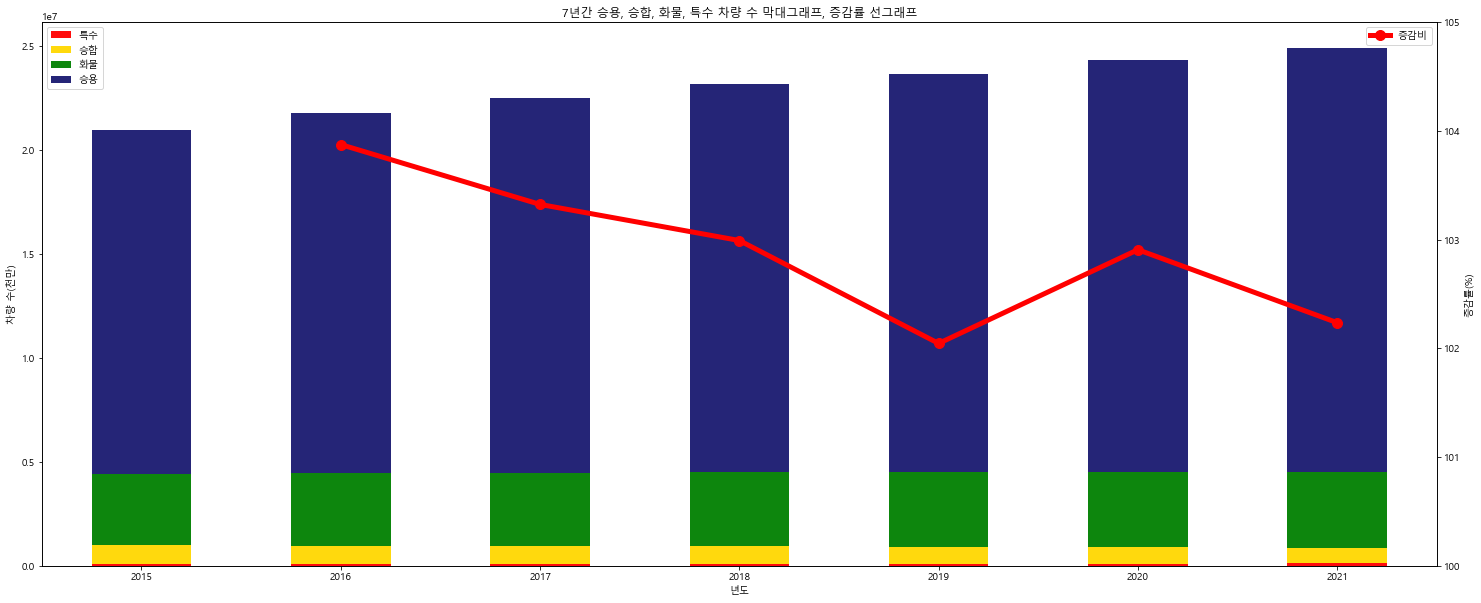

In [18]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (25, 10)

# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
ax1 = df[['특수','승합','화물','승용']].plot.bar(stacked=True,
                                                 color=['red','gold','green','midnightblue'],
                                                 alpha=0.95)
# x축 범위?
a = list(range(0,7,1))
plt.xticks([i for i in range(0,7,1)], k, rotation = 0)

# title
plt.xlabel("년도")
plt.ylabel("차량 수(천만)")
plt.legend(loc="upper left")

ax2 = ax1.twinx()
ax2 = df['증감비'].plot(color='red', marker='o', markersize=10, linewidth = 5)

plt.title("7년간 승용, 승합, 화물, 특수 차량 수 막대그래프, 증감률 선그래프")
plt.ylabel("증감률(%)")
plt.ylim(100, 105)
# x축 범위?
a = list(range(0,7,1))
plt.xticks([i for i in range(0,7,1)], k, rotation = 0)


# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
# plt.grid(True)

plt.show()